# Figure for estimated channel bleed-through based on seq_qc data

This notebook creates Supplementary Figure 5b, based on the estimated bleed-through factors calculated in the [corresponding analysis notebook](./channel_bleed_through_plot.ipynb).

In [1]:
library(tidyverse)
theme_set(theme_light())
theme_update(text = element_text(family = "Calibri"), strip.text = element_text(colour = 'black'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
values <- read_csv("analysis/bleed_through/lasso_results.csv")

Rows: 192 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sample, fov, source
dbl (5): round, A, G, T, C

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


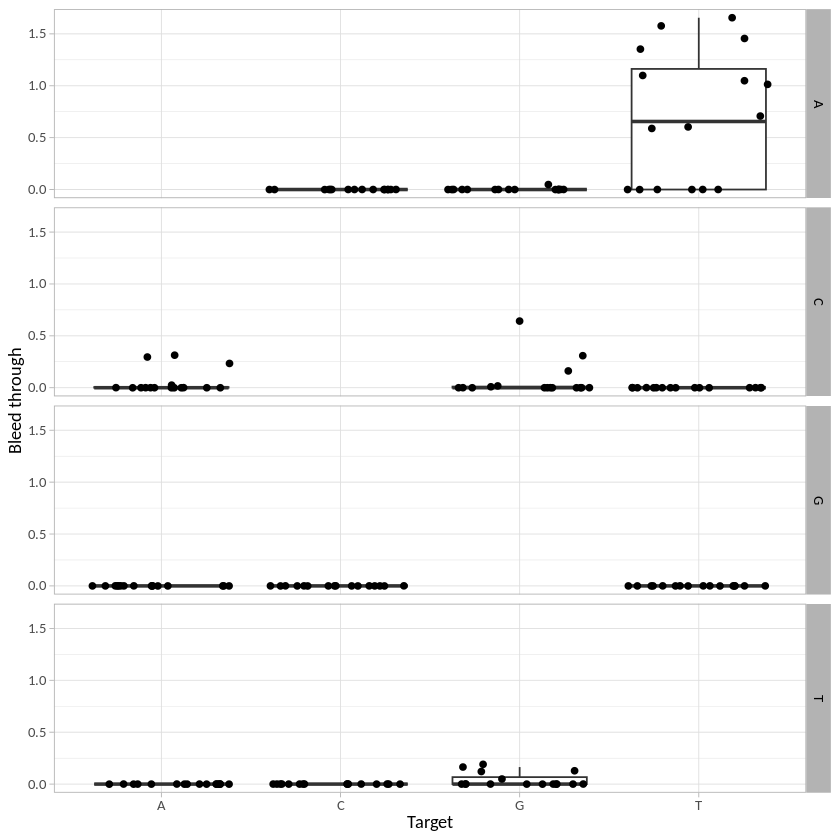

In [3]:
values %>%
	filter(round == 0) %>%
	pivot_longer(cols = A:C, names_to = "target", values_to = "bleed_through") %>%
	filter(source!=target) %>%
	ggplot(aes(x = target, y = bleed_through)) +
		geom_boxplot(outlier.shape=NA) +
		facet_grid(source ~ .) +
    xlab("Target") +
    ylab("Bleed through") +
		geom_jitter() #aes(color=sample))

In [4]:
ggsave("figures/supp-fig5b-bleed_through.svg", width = 6, height = 4, dpi = 300)